# Data Exploration 04

In [14]:
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

Version: 2020-04-03 17:35:17


# Modelling

In [18]:
# select featureset and import the training data
import pandas as pd
from utils import utils
import seaborn as sns; sns.set()

dataset = './data/dataset_benchmark.csv'

# the recommended 
featureset = './features/features_benchmark.yaml'
# featureset = './features/features_custom.yaml'
# featureset = './features/features_modelling_01.yaml'
# featureset = './features/features_modelling_02.yaml'

df, x, y, x_train, x_test, y_train, y_test = utils.load_benchmark_dataset(dataset, featureset, dropna=True,)
classes = ['CN', 'MCI', 'AD']

Loading dataset from ./data/dataset_benchmark.csv
Loading features from ./features/features_benchmark.yaml
dataset length: 4133
x_train length: 3719
y_train length: 3719
x_test length: 414
y_test length: 414


In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4133 entries, 0 to 8881
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ADAS13           4133 non-null   float64
 1   Ventricles       4133 non-null   float64
 2   CDRSB            4133 non-null   float64
 3   ADAS11           4133 non-null   float64
 4   MMSE             4133 non-null   float64
 5   RAVLT_immediate  4133 non-null   float64
 6   Hippocampus      4133 non-null   float64
 7   WholeBrain       4133 non-null   float64
 8   Entorhinal       4133 non-null   float64
 9   MidTemp          4133 non-null   float64
 10  APOE4            4133 non-null   float64
 11  AGE_AT_EXAM      4133 non-null   float64
dtypes: float64(12)
memory usage: 419.8 KB


In [4]:
# # recall the number of state changes within the total dataset
# import numpy as np

# def get_state_changes(df):
#     map_encodings = {0: '0: CN', 1: '1: MCI', 2: '2: AD',}
#     cond = df['diagnosis_encoded'] != df['target_diagnosis_encoded']
#     changes = (df['diagnosis_encoded'].map(map_encodings) + ' --> ' + df['target_diagnosis_encoded'].map(map_encodings)).where(cond, np.nan)
#     return changes

# df_changes = get_state_changes(df)

# print(f'total n state changes: {df_changes.notna().sum()}')
# print(df_changes.value_counts())
# sns.countplot(df_changes.sort_values())

# Classification

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

C = 1
# C = 1000000

scaled_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=C, class_weight='balanced', random_state=42, probability=True))
])

scaled_svc.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

preds = scaled_svc.predict_proba(x_test)

roc_auc_score(y_test, preds, multi_class='ovo')

0.9517180358019109

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


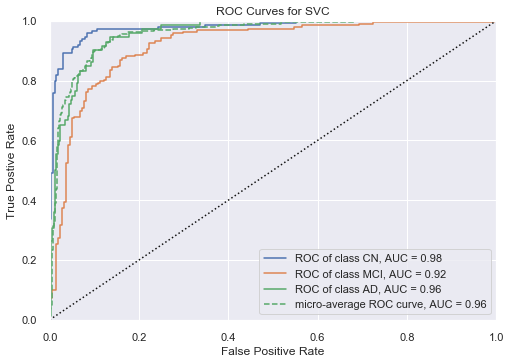

In [19]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(scaled_svc, macro=False, classes=classes)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


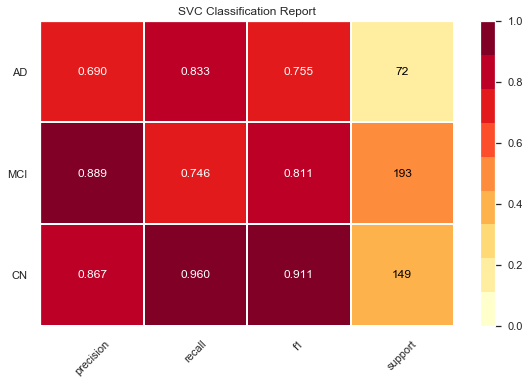

In [20]:
# pr statistics - compare weighted squared f1 not accuracy across models
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(scaled_svc, classes=classes, support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


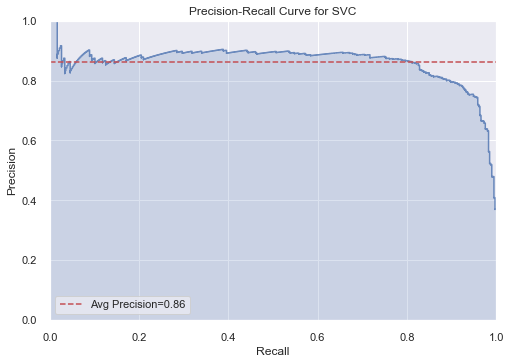

In [21]:
# pr curve
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = PrecisionRecallCurve(scaled_svc, classes=classes)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


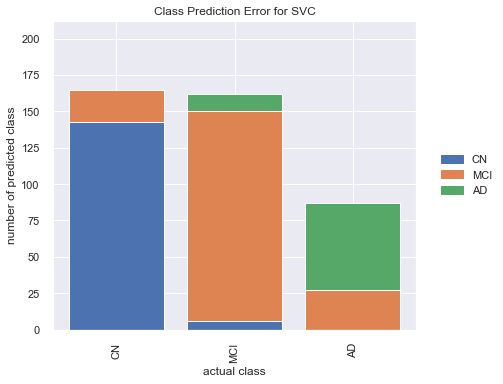

In [22]:
# look at the predictions
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(scaled_svc, classes=classes)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# Regression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

C = 1
# C = 1000000

model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVR(C=C))
])

model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

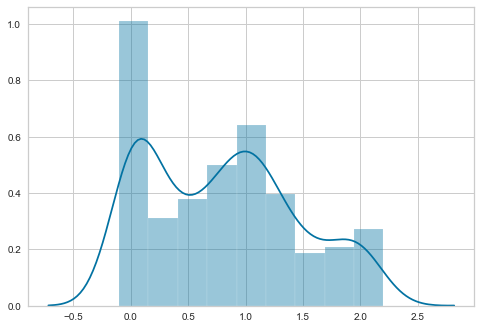

In [12]:
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

preds = model.predict(x_test)

sns.distplot(preds)

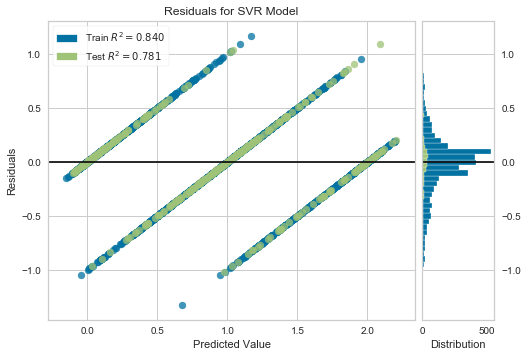

In [13]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()